# need to downlod

In [1]:
# Install CUML CUDF

!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 597, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 597 (delta 128), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (597/597), 196.59 KiB | 1.09 MiB/s, done.
Resolving deltas: 100% (302/302), done.
Installing RAPIDS remaining 25.04 libraries
Using Python 3.11.13 environment at: /usr
Resolved 175 packages in 1.71s
 Downloaded shapely
 Downloaded cuproj-cu12
 Downloaded rmm-cu12
 Downloaded libkvikio-cu12
 Downloaded pylibcugraph-cu12
 Downloaded dask
 Downloaded datashader
 Downloaded ucx-py-cu12
 Downloaded bokeh
 Downloaded cugraph-cu12
 Downloaded librmm-cu12
 Downloaded cuspatial-cu12
 Downloaded cudf-cu12
 Downloaded cucim-cu12
 Downloaded cuml-cu12
 Downloaded libcuspatial-cu12
 Downloaded pylibcudf-cu12
 Downloaded nvidia-nvcomp-cu12
 Downloaded libraft-cu12
 Downloaded libcudf-cu12
 Downloaded raft-dask-cu12
 Downloaded l

In [2]:
import cuml
cuml.__version__

'25.04.00'

In [6]:
dir(cuml.svm)

['LinearSVC',
 'LinearSVR',
 'SVC',
 'SVR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'linear',
 'linear_svc',
 'linear_svr',
 'svc',
 'svm_base',
 'svr']

# all import

In [18]:
import numpy as np
import pandas as pd
import time
import yfinance as yf
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from cuml.svm import SVC
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score

# get Data

In [3]:
btc = yf.download("BTC-USD", start="2022-01-01")

btc

/tmp/ipython-input-1556802982.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2022-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2022-01-01,47686.812500,47827.312500,46288.484375,46311.746094,24582667004
2022-01-02,47345.218750,47881.406250,46856.937500,47680.925781,27951569547
2022-01-03,46458.117188,47510.726562,45835.964844,47343.542969,33071628362
2022-01-04,45897.574219,47406.546875,45752.464844,46458.851562,42494677905
2022-01-05,43569.003906,46929.046875,42798.222656,45899.359375,36851084859
...,...,...,...,...,...
2025-08-11,118731.445312,122321.093750,118159.031250,119306.812500,90528784177
2025-08-12,120172.906250,120302.468750,118228.718750,118717.664062,72803657984


# make Data Frame

In [4]:
df = pd.DataFrame()
df['today'] = btc["Close"]
df['tomorrow'] = df["today"].shift(-1)
df['yesterday'] = df['today'].shift(1)
df['CandleStickDirectionForecasting'] = (df['tomorrow'] > df['today']).astype(int)
df.dropna(inplace = True)
print(df.head(10))

                   today      tomorrow     yesterday  \
Date                                                   
2022-01-02  47345.218750  46458.117188  47686.812500   
2022-01-03  46458.117188  45897.574219  47345.218750   
2022-01-04  45897.574219  43569.003906  46458.117188   
2022-01-05  43569.003906  43160.929688  45897.574219   
2022-01-06  43160.929688  41557.902344  43569.003906   
2022-01-07  41557.902344  41733.941406  43160.929688   
2022-01-08  41733.941406  41911.601562  41557.902344   
2022-01-09  41911.601562  41821.261719  41733.941406   
2022-01-10  41821.261719  42735.855469  41911.601562   
2022-01-11  42735.855469  43949.101562  41821.261719   

            CandleStickDirectionForecasting  
Date                                         
2022-01-02                                0  
2022-01-03                                0  
2022-01-04                                0  
2022-01-05                                0  
2022-01-06                                0  
2022-

In [5]:
df['today'].head()

,today
Date,
2022-01-02,47345.218750
2022-01-03,46458.117188
2022-01-04,45897.574219
2022-01-05,43569.003906
2022-01-06,43160.929688


In [32]:
print(df.isnull().sum())

today                              0
tomorrow                           0
CandleStickDirectionForecasting    0
dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1322 entries, 2022-01-01 to 2025-08-14
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   today                            1322 non-null   float64
 1   tomorrow                         1322 non-null   float64
 2   CandleStickDirectionForecasting  1322 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 41.3 KB


# Mashin Lerning

In [37]:
results = []

## Split Data

In [7]:
X = df[['today', 'yesterday']]
y = df['CandleStickDirectionForecasting']

#x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8,shuffle = False)

train_size = int(len(df) * 0.8)

x_train = X[:train_size]
y_train = y[:train_size]

x_test = X[train_size:]
y_test = y[train_size:]

print(x_train, x_test)
print(y_train, y_test)



                   today     yesterday
Date                                  
2022-01-02  47345.218750  47686.812500
2022-01-03  46458.117188  47345.218750
2022-01-04  45897.574219  46458.117188
2022-01-05  43569.003906  45897.574219
2022-01-06  43160.929688  43569.003906
...                  ...           ...
2024-11-18  90542.640625  89845.851562
2024-11-19  92343.789062  90542.640625
2024-11-20  94339.492188  92343.789062
2024-11-21  98504.726562  94339.492188
2024-11-22  98997.664062  98504.726562

[1056 rows x 2 columns]                     today      yesterday
Date                                    
2024-11-23   97777.281250   98997.664062
2024-11-24   98013.820312   97777.281250
2024-11-25   93102.296875   98013.820312
2024-11-26   91985.320312   93102.296875
2024-11-27   95962.531250   91985.320312
...                   ...            ...
2025-08-10  119306.757812  116500.359375
2025-08-11  118731.445312  119306.757812
2025-08-12  120172.906250  118731.445312
2025-08-13  12334

In [8]:
print(x_test)

                    today      yesterday
Date                                    
2024-11-23   97777.281250   98997.664062
2024-11-24   98013.820312   97777.281250
2024-11-25   93102.296875   98013.820312
2024-11-26   91985.320312   93102.296875
2024-11-27   95962.531250   91985.320312
...                   ...            ...
2025-08-10  119306.757812  116500.359375
2025-08-11  118731.445312  119306.757812
2025-08-12  120172.906250  118731.445312
2025-08-13  123344.062500  120172.906250
2025-08-14  118359.578125  123344.062500

[265 rows x 2 columns]


## CSV

In [38]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_params = {
    "C": [0.1, 0.5, 1, 5, 10],
    "gamma": [0.1, 0.5, 1, 5, 10],
    "kernel": ["linear", "poly", "rbf"]
}

clf = SVC()

grid_model = GridSearchCV(clf, param_grid=model_params, cv=5,verbose=3, scoring="accuracy")
grid_model.fit(x_train_scaled,y_train)

best_model = grid_model.best_estimator_
print(grid_model.best_params_)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.486 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.507 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.507 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.502 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.498 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.486 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.507 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.507 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.502 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.498 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.486 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [27]:
model_params = {
    "C": [0.3, 0.4, 0.5, 0.6, 0.7],
    "gamma": [8, 9, 10, 11, 12],
    "kernel": ["linear", "poly", "rbf"]
}

clf = SVC()

grid_model = GridSearchCV(clf, param_grid=model_params, cv=5,verbose=3, scoring="accuracy")
grid_model.fit(x_train_scaled,y_train)

best_model = grid_model.best_estimator_
print(grid_model.best_params_)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.3, gamma=8, kernel=linear;, score=0.491 total time=   0.0s
[CV 2/5] END .....C=0.3, gamma=8, kernel=linear;, score=0.540 total time=   0.0s
[CV 3/5] END .....C=0.3, gamma=8, kernel=linear;, score=0.507 total time=   0.0s
[CV 4/5] END .....C=0.3, gamma=8, kernel=linear;, score=0.412 total time=   0.0s
[CV 5/5] END .....C=0.3, gamma=8, kernel=linear;, score=0.540 total time=   0.0s
[CV 1/5] END .......C=0.3, gamma=8, kernel=poly;, score=0.491 total time=   0.0s
[CV 2/5] END .......C=0.3, gamma=8, kernel=poly;, score=0.540 total time=   0.0s
[CV 3/5] END .......C=0.3, gamma=8, kernel=poly;, score=0.507 total time=   0.0s
[CV 4/5] END .......C=0.3, gamma=8, kernel=poly;, score=0.412 total time=   0.0s
[CV 5/5] END .......C=0.3, gamma=8, kernel=poly;, score=0.540 total time=   0.0s
[CV 1/5] END ........C=0.3, gamma=8, kernel=rbf;, score=0.491 total time=   0.0s
[CV 2/5] END ........C=0.3, gamma=8, kernel=rbf

### -----------------------------------------------------------------------------------------
### best
C=0.3, gamma=8, kernel=linear;, score=0.540 total time=   0.0s
### -----------------------------------------------------------------------------------------


In [39]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# فقط اگه به ترتیب ران نکرده باشی نیازه که این حتما بایشه پس دوباره قرار میدم

best_param_combinations = [
    {'C': 0.3, 'gamma': 8, 'kernel': 'linear'},
    {'C': 0.3, 'gamma': 8, 'kernel': 'rbf'},
    {'C': 0.3, 'gamma': 8, 'kernel': 'poly'}
]


for params in best_param_combinations:
    model = SVC(C=params['C'], gamma=params['gamma'], kernel=params['kernel'])

    start_time_train = time.time()

    model.fit(x_train_scaled, y_train)

    end_time_train = time.time()
    elapsed_time_train = end_time_train - start_time_train
    print(f"مدت زمان تمرین : {elapsed_time_train:.4f} ثانیه")
    y_pred_train = model.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"accuracy_train : {accuracy_train}")


    start_time_test = time.time()

    y_pred = model.predict(x_test_scaled)


    end_time_test = time.time()
    elapsed_time_test = end_time_test - start_time_test
    print(f"مدت زمان پیش بینی : {elapsed_time_test:.4f} ثانیه")
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"accuracy_test : {accuracy_test}")


    SVC_results = {
    'kernel': f"SVC {params['kernel']}",
    'accuracy_train': accuracy_train,
    'accuracy_test': accuracy_test,
    'time_train': elapsed_time_train,
    'time_test': elapsed_time_test
    }

    results.append(SVC_results)

مدت زمان تمرین : 0.0209 ثانیه
accuracy_train : 0.4952651515151515
مدت زمان پیش بینی : 0.0016 ثانیه
accuracy_test : 0.5056603773584906
مدت زمان تمرین : 0.0236 ثانیه
accuracy_train : 0.4952651515151515
مدت زمان پیش بینی : 0.0027 ثانیه
accuracy_test : 0.5056603773584906
مدت زمان تمرین : 27.2690 ثانیه
accuracy_train : 0.4971590909090909
مدت زمان پیش بینی : 0.0184 ثانیه
accuracy_test : 0.5283018867924528


## KNN

In [40]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


start_time_train = time.time()

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_scaled, y_train)


end_time_train = time.time()
elapsed_time_train = end_time_train - start_time_train
print(f"مدت زمان تمرین : {elapsed_time_train:.4f} ثانیه")
y_pred_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"accuracy_train : {accuracy_train}")




start_time_test = time.time()


y_pred = knn_model.predict(X_test_scaled)


end_time_test = time.time()
elapsed_time_test = end_time_test - start_time_test
print(f"مدت زمان پیش بینی : {elapsed_time_test:.4f} ثانیه")
accuracy_test = accuracy_score(y_test, y_pred)
print(f"accuracy_test : {accuracy_test}")


knn_results = {
    'kernel': 'KNeighborsClassifier',
    'accuracy_train': accuracy_train,
    'accuracy_test': accuracy_test,
    'time_train': elapsed_time_train,
    'time_test': elapsed_time_test
}

results.append(knn_results)

مدت زمان تمرین : 0.0015 ثانیه
accuracy_train : 0.4952651515151515
مدت زمان پیش بینی : 0.0017 ثانیه
accuracy_test : 0.5018867924528302


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## LogisticRegression

In [41]:
start_time_train = time.time()


model = LogisticRegression(max_iter=2000)

model.fit(x_train, y_train)


end_time_train = time.time()
elapsed_time_train = end_time_train - start_time_train
print(f"مدت زمان تمرین : {elapsed_time_train:.4f} ثانیه")
y_pred_train = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"accuracy_train : {accuracy_train}")





start_time_test = time.time()

y_pred = model.predict(x_test)



end_time_test = time.time()
elapsed_time_test = end_time_test - start_time_test
print(f"مدت زمان پیش بینی : {elapsed_time_test:.4f} ثانیه")
accuracy_test = accuracy_score(y_test, y_pred)
print(f"accuracy_test : {accuracy_test}")


logreg_results = {
    'kernel': 'LogisticRegression',
    'accuracy_train': accuracy_train,
    'accuracy_test': accuracy_test,
    'time_train': elapsed_time_train,
    'time_test': elapsed_time_test
}

results.append(logreg_results)
#Kernel.append{'kernel':'LogisticRegression','accuracy_train':accuracy_train,'accuracy_test':accuracy_test,'time_train':elapsed_time_train,'time_tset':elapsed_time_tset }

مدت زمان تمرین : 0.0372 ثانیه
accuracy_train : 0.5359848484848485
مدت زمان پیش بینی : 0.0012 ثانیه
accuracy_test : 0.5207547169811321


# PLT

In [42]:
results

[{'kernel': 'SVC linear',
  'accuracy_train': 0.4952651515151515,
  'accuracy_test': 0.5056603773584906,
  'time_train': 0.020864009857177734,
  'time_test': 0.0015704631805419922},
 {'kernel': 'SVC rbf',
  'accuracy_train': 0.4952651515151515,
  'accuracy_test': 0.5056603773584906,
  'time_train': 0.023624181747436523,
  'time_test': 0.00272369384765625},
 {'kernel': 'SVC poly',
  'accuracy_train': 0.4971590909090909,
  'accuracy_test': 0.5283018867924528,
  'time_train': 27.26895546913147,
  'time_test': 0.018352746963500977},
 {'kernel': 'KNeighborsClassifier',
  'accuracy_train': 0.4952651515151515,
  'accuracy_test': 0.5018867924528302,
  'time_train': 0.001455068588256836,
  'time_test': 0.0016698837280273438},
 {'kernel': 'LogisticRegression',
  'accuracy_train': 0.5359848484848485,
  'accuracy_test': 0.5207547169811321,
  'time_train': 0.03720736503601074,
  'time_test': 0.0012371540069580078}]

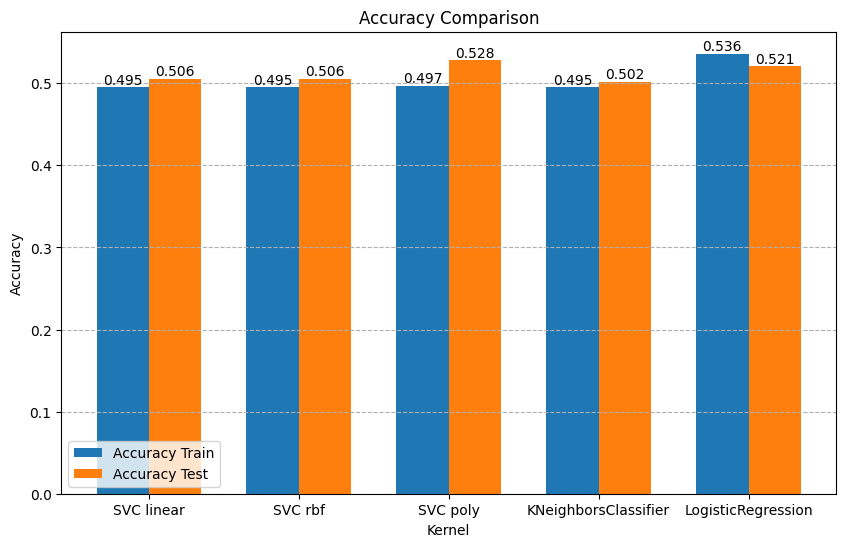

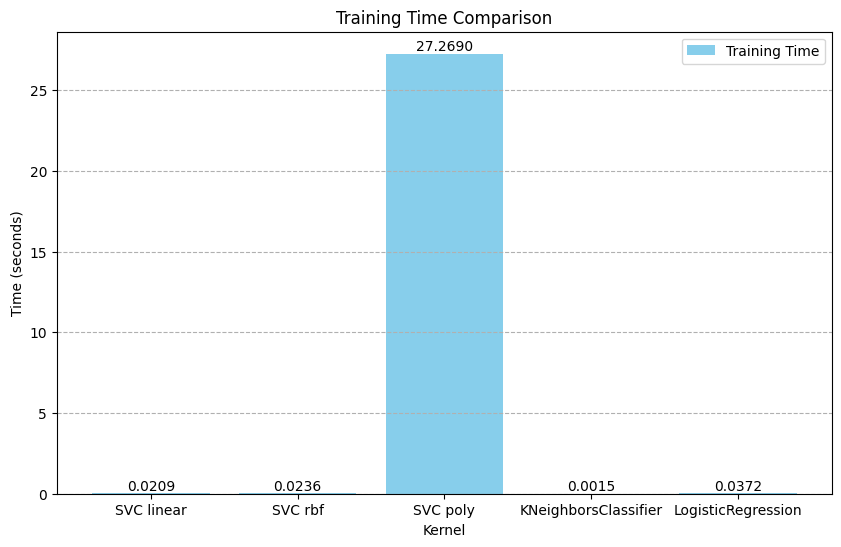

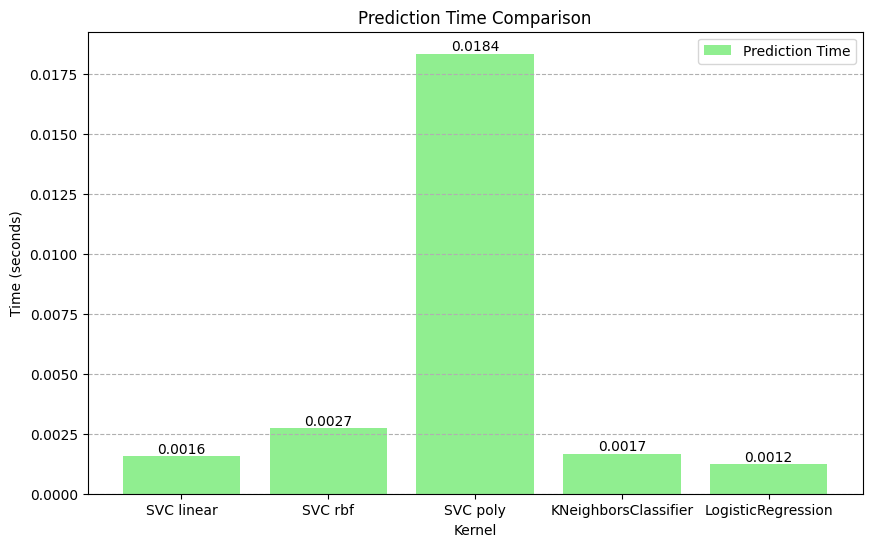

In [54]:
kernels = results_df['kernel']
accuracy_train = results_df['accuracy_train']
accuracy_test = results_df['accuracy_test']
time_train = results_df['time_train']
time_test = results_df['time_test']

#  نمودار مقایسه دقت
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(kernels))
bars_acc_train = plt.bar(x - bar_width/2, accuracy_train, bar_width, label='Accuracy Train')
bars_acc_test = plt.bar(x + bar_width/2, accuracy_test, bar_width, label='Accuracy Test')
plt.title('Accuracy Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.xticks(x, kernels)
plt.legend()
plt.grid(axis='y', linestyle='--')

for bar in bars_acc_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', ha='center', va='bottom')
for bar in bars_acc_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', ha='center', va='bottom')

plt.show()

#  نمودار مقایسه زمان آموزش
plt.figure(figsize=(10, 6))
bars_time_train = plt.bar(kernels, time_train, color='skyblue', label='Training Time')
plt.title('Training Time Comparison')
plt.xlabel('Kernel')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(axis='y', linestyle='--')

for bar in bars_time_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

# نمودار مقایسه زمان پیش‌بینی
plt.figure(figsize=(10, 6))
bars_time_test = plt.bar(kernels, time_test, color='lightgreen', label='Prediction Time')
plt.title('Prediction Time Comparison')
plt.xlabel('Kernel')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(axis='y', linestyle='--')

for bar in bars_time_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()